## **TPS: Analysis of Arrests and Strip Searches**
Course: INF 2178 \
Group 63 - Eva Li, Purui Zhang

## **Import libraries and dataset**

In [174]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [175]:
# load dataset from github
url = 'https://raw.githubusercontent.com/evali09/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv'
df = pd.read_csv(url)
df.head()


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


#### **Processing the Dataset**
- As per the dataset information, there are instances in the dataset where there was a strip search but the data does not indicate that the booking took place. We can assume the booking has taken place.

- Replace 0 with 1 if strip search == 1

In [176]:
# check if there are any instances where a person was strip searched but was not booked in record

df[(df["StripSearch"]==1) & (df["Booked"]==0)]["Booked"].count()

572

In [177]:
# create a copy of the original dataset
processed_df = df.copy()
processed_df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [178]:
# define a function to modify the Booked column based on the StripSearch column
def modify_booked(row):
    if row['StripSearch'] == 1 and row['Booked'] == 0:
        return 1
    else:
        return row['Booked']

# use apply to modify the Booked column based on the StripSearch column
processed_df['Booked'] = processed_df.apply(modify_booked, axis=1)
processed_df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [179]:
# check if there are any instances where a person was strip searched but was not booked in record

processed_df[(processed_df["StripSearch"]==1) & (processed_df["Booked"]==0)]["Booked"].count()


0

In [180]:
# checking for duplicated records
processed_df.duplicated().any()

False

**Handling of Missing Values for Independent Variable: Perceived Race**

In [181]:
# missing values in percieved race
missing_perceived_race = processed_df["Perceived_Race"].isnull().sum()

print(f"Number of missing values for perceived race: {missing_perceived_race}")

Number of missing values for perceived race: 4


In [182]:
# fill missing values as "Unknown or Legacy" 
processed_df["Perceived_Race"] = processed_df["Perceived_Race"].fillna("Unknown or Legacy")

# checking for missing race
processed_df["Perceived_Race"].isnull().any()

False

**Replacing string values for Age Group at Arrest and Youth for consistency**

In [184]:
# replace 'Aged 17 years and younger' as 'Aged 17 years and under' for consistency
processed_df["Age_group__at_arrest_"] = processed_df["Age_group__at_arrest_"].replace({
    'Aged 17 years and younger': 'Aged 17 years and under',
    'Aged 65 years and older':'Aged 65 and older'
})
processed_df['Age_group__at_arrest_'].unique()

array(['Aged 35 to 44 years', 'Aged 25 to 34 years',
       'Aged 45 to 54 years', 'Aged 55 to 64 years',
       'Aged 18 to 24 years', 'Aged 65 and older', nan,
       'Aged 17 years and under'], dtype=object)

In [185]:
# replace 'Youth (aged 17 and younger)' as 'Youth (aged 17 years and under)' for consistency
processed_df["Youth_at_arrest__under_18_years"] = processed_df["Youth_at_arrest__under_18_years"].replace({'Youth (aged 17 and younger)': 'Youth (aged 17 years and under)'})

processed_df['Youth_at_arrest__under_18_years'].unique()

array(['Not a youth', 'Youth (aged 17 years and under)'], dtype=object)

## **Exploratory Data Analysis**

In [ ]:
# description of the dataset
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65276 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [ ]:
# shape of the dataset
processed_df.shape

(65276, 25)

In [ ]:
# count of overall arrests
total_arrests = len(processed_df["PersonID"].unique())

print(f"Total number of overall arrests: {total_arrests}")

Total number of overall arrests: 37347


#### **Univariate Analysis: Frequency of Arrests by Each Categorical Variable** 

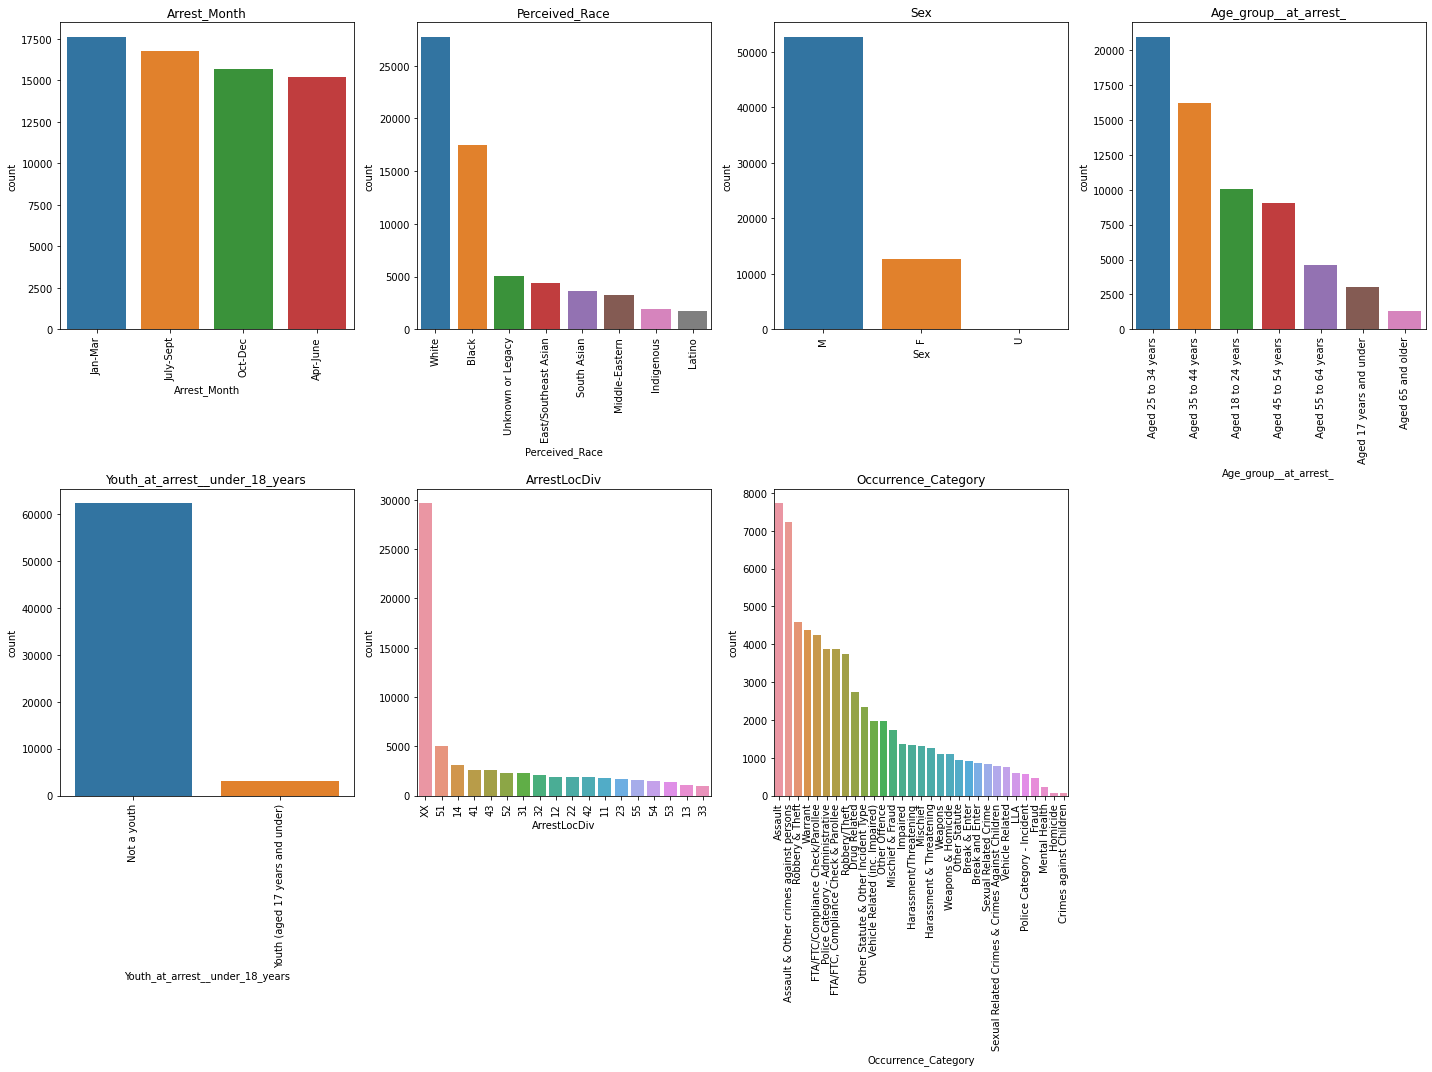

In [186]:
# creating a list of categorical variables
categorical_var = list(df.select_dtypes("object"))

# visualizing the frequency of each class of a categorical variable
f = plt.figure(figsize=(20, 15))

# loop through the length of list of categorical variables and keep track of index
for n, var in enumerate(categorical_var):
    # add a new subplot iteratively
    ax = plt.subplot(2, 4, n + 1)

    count_df = processed_df.groupby(var).size().reset_index(name="count")
    count_df.sort_values(by="count", ascending=False, inplace=True)

    # plot subplot
    ax = sns.barplot(x=count_df[var], y=count_df['count'])

    # rotate ticks
    plt.xticks(rotation=90)

    # add subplot name
    plt.title(var)  

# adjust spacing of subplots
plt.tight_layout()

In [188]:
# aggregated count of each class in Arrest_Month
month_df = processed_df.groupby("Arrest_Month").size().reset_index(name="count")
month_df.sort_values(by="count", ascending=False, inplace=True)
month_df["relative_frequency"] = month_df["count"].apply(lambda x: (x/(month_df["count"].sum()))*100).round(1)
month_df

,Arrest_Month,count,relative_frequency
1,Jan-Mar,17613,27.0
2,July-Sept,16773,25.7
3,Oct-Dec,15705,24.1
0,Apr-June,15185,23.3


In [189]:
# aggregated count of each class in perceived race
count_race_df = processed_df.groupby("Perceived_Race").size().reset_index(name="count")
count_race_df.sort_values(by="count", ascending=False, inplace=True)
count_race_df["relative_frequency"] = count_race_df["count"].apply(lambda x: (x/(count_race_df["count"].sum()))*100).round(1)
count_race_df

,Perceived_Race,count,relative_frequency
7,White,27723,42.5
0,Black,17526,26.8
6,Unknown or Legacy,5060,7.8
1,East/Southeast Asian,4415,6.8
5,South Asian,3613,5.5
4,Middle-Eastern,3237,5.0
2,Indigenous,1934,3.0
3,Latino,1768,2.7


In [190]:
# aggregated count of each class in sex
count_sex_df = processed_df.groupby("Sex").size().reset_index(name="count")
count_sex_df.sort_values(by="count", ascending=False, inplace=True)
count_sex_df["relative_frequency"] = count_sex_df["count"].apply(lambda x: (x/(count_sex_df["count"].sum()))*100).round(1)
count_sex_df

,Sex,count,relative_frequency
1,M,52650,80.7
0,F,12617,19.3
2,U,9,0.0


In [191]:
# aggregated count of each class in Age_group__at_arrest_'
count_age_df = processed_df.groupby("Age_group__at_arrest_").size().reset_index(name="count")
count_age_df.sort_values(by="count", ascending=False, inplace=True)
count_age_df["relative_frequency"] = count_age_df["count"].apply(lambda x: (x/(count_age_df["count"].sum()))*100).round(1)
count_age_df

,Age_group__at_arrest_,count,relative_frequency
2,Aged 25 to 34 years,20949,32.1
3,Aged 35 to 44 years,16242,24.9
1,Aged 18 to 24 years,10041,15.4
4,Aged 45 to 54 years,9066,13.9
5,Aged 55 to 64 years,4590,7.0
0,Aged 17 years and under,3042,4.7
6,Aged 65 and older,1322,2.0


In [192]:
# aggregated count of each class in Youth at arrest'
count_youth_df = processed_df.groupby("Youth_at_arrest__under_18_years").size().reset_index(name="count")
count_youth_df.sort_values(by="count", ascending=False, inplace=True)
count_youth_df["relative_frequency"] = count_youth_df["count"].apply(lambda x: (x/(count_youth_df["count"].sum()))*100).round(1)
count_youth_df

,Youth_at_arrest__under_18_years,count,relative_frequency
0,Not a youth,62234,95.3
1,Youth (aged 17 years and under),3042,4.7


#### **Analysis of Encounter-Specific Variables by Perceived Race and Sex**

In [193]:
processed_df.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [194]:
# subset for encounter-specific variables by perceived race

race_encounter_df = processed_df[["Perceived_Race", 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative']].copy()
race_encounter_df.head()

,Perceived_Race,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,White,0,0,0,0,0,1
1,White,0,0,0,0,0,0
2,Unknown or Legacy,0,0,0,0,0,0
3,Black,0,0,0,0,0,0
4,South Asian,0,0,0,0,0,0


In [195]:
# get total frequency of occurrence for each encounter-specific variable grouped by race
grouped_race_encounter_df = race_encounter_df.groupby(["Perceived_Race"]).agg("sum")
grouped_race_encounter_df

,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
Perceived_Race,,,,,,
Black,98,836,796,665,143,7466
East/Southeast Asian,15,123,117,106,10,2268
Indigenous,7,162,122,78,23,762
Latino,4,72,61,42,12,897
Middle-Eastern,13,122,103,110,16,1514
South Asian,12,126,90,82,14,1667
Unknown or Legacy,14,154,140,103,26,2220
White,103,1286,1073,993,171,12315


In [196]:
# get relative frequency of behaviour for each race 

relative_freq_df = grouped_race_encounter_df.copy()
for column in relative_freq_df.columns:
    total = relative_freq_df[column].sum()
    relative_freq_df[column] = (relative_freq_df[column] / total)*100

relative_freq_df.round(1)

,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
Perceived_Race,,,,,,
Black,36.8,29.0,31.8,30.5,34.5,25.6
East/Southeast Asian,5.6,4.3,4.7,4.9,2.4,7.8
Indigenous,2.6,5.6,4.9,3.6,5.5,2.6
Latino,1.5,2.5,2.4,1.9,2.9,3.1
Middle-Eastern,4.9,4.2,4.1,5.0,3.9,5.2
South Asian,4.5,4.4,3.6,3.8,3.4,5.7
Unknown or Legacy,5.3,5.3,5.6,4.7,6.3,7.6
White,38.7,44.6,42.9,45.6,41.2,42.3


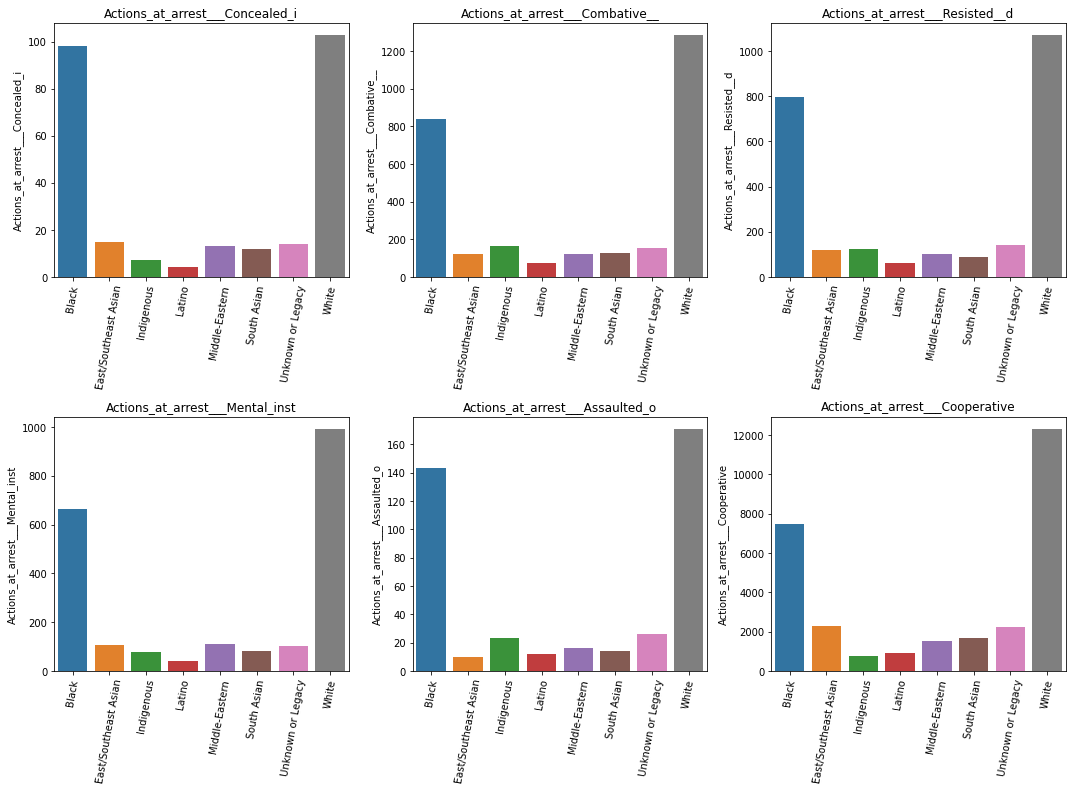

In [197]:
# visualize frequency of the type police-suspect interaction engaged at arrest by race
grouped_race_encounter_df.reset_index(inplace=True)

f = plt.figure(figsize=(15, 15))

encounter_vars = list(grouped_race_encounter_df.columns)[1:]

for n, var in enumerate(encounter_vars):
  ax = plt.subplot(3, 3, n+1)

  ax = sns.barplot(data = grouped_race_encounter_df, x = grouped_race_encounter_df["Perceived_Race"].unique(), y=var)

  plt.title(var)
  plt.xticks(rotation=80)

plt.tight_layout()

In [198]:
# subset for encounter-specific variables by sex

sex_encounter_df = processed_df[["Sex", 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative']].copy()
sex_encounter_df.head()

,Sex,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,M,0,0,0,0,0,1
1,M,0,0,0,0,0,0
2,M,0,0,0,0,0,0
3,M,0,0,0,0,0,0
4,M,0,0,0,0,0,0


In [199]:
# get total frequency of occurrence for each encounter-specific variable grouped by sex
grouped_sex_encounter_df = sex_encounter_df.groupby(["Sex"]).agg("sum").reset_index()
grouped_sex_encounter_df

,Sex,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,F,21,563,433,505,105,5430
1,M,245,2317,2069,1672,310,23676
2,U,0,1,0,2,0,3


In [200]:
# get relative frequency of behaviour for each race 

relative_freq_sex_df = grouped_sex_encounter_df.copy()
for column in relative_freq_df.columns:
    total = relative_freq_sex_df[column].sum()
    relative_freq_sex_df[column] = (relative_freq_sex_df[column] / total)*100

relative_freq_sex_df.round(3)

,Sex,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative
0,F,7.895,19.542,17.306,23.176,25.301,18.654
1,M,92.105,80.423,82.694,76.732,74.699,81.336
2,U,0.000,0.035,0.000,0.092,0.000,0.010


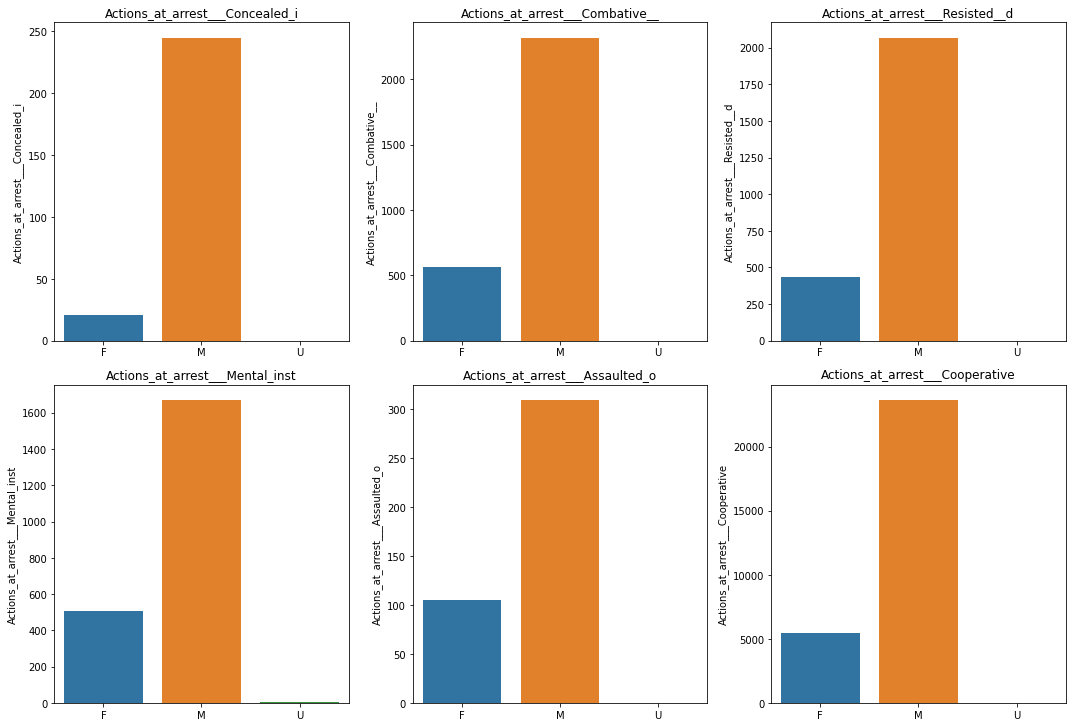

In [ ]:
# visualize frequency of the type police-suspect interaction engaged at arrest by sex
f = plt.figure(figsize=(15, 15))

encounter_vars = list(grouped_sex_encounter_df.columns)[1:]

for n, var in enumerate(encounter_vars):
  ax = plt.subplot(3, 3, n+1)

  ax = sns.barplot(data = grouped_sex_encounter_df, x = grouped_sex_encounter_df["Sex"].unique(), y=var)

  plt.title(var)

plt.tight_layout()


#### **Analysis of Independent Variable: Sex**

In [201]:
# create sex subset
sex_subset_df = processed_df.groupby(["PersonID","Sex", "Age_group__at_arrest_"]).agg({"PersonID":"count", "Booked":"sum", "StripSearch":"sum" })
sex_subset_df.rename(columns={"PersonID":"count_of_arrests"}, inplace=True)
sex_subset_df.reset_index(inplace=True)
sex_subset_df

,PersonID,Sex,Age_group__at_arrest_,count_of_arrests,Booked,StripSearch
0,300000,M,Aged 35 to 44 years,1,0,0
1,300001,F,Aged 17 years and under,1,1,0
2,300002,M,Aged 35 to 44 years,1,0,0
3,300003,M,Aged 25 to 34 years,6,5,1
4,300003,M,Aged 35 to 44 years,2,1,0
...,...,...,...,...,...,...
38217,337342,M,Aged 17 years and under,5,1,0
38218,337343,M,Aged 35 to 44 years,1,1,0
38219,337344,M,Aged 18 to 24 years,1,1,1
38220,337345,M,Aged 65 and older,1,0,0


**Sex and Frequency of Booked and Strip Search**

Text(0.5, 1.0, 'Distribution of Frequency of Strip Searches by Sex')

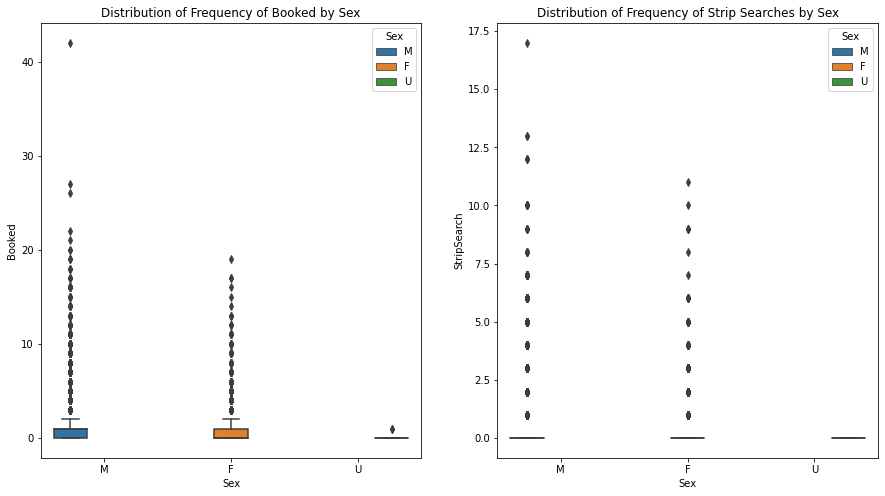

In [202]:
# distribution of the frequency of strip search and booked by sex
f, axes = plt.subplots(1, 2, figsize=(15, 8))

# distribution of booked by sex
sns.boxplot(data=sex_subset_df, x = "Sex", y = "Booked", hue="Sex", ax= axes[0])
axes[0].set_title("Distribution of Frequency of Booked by Sex")

# distribution of strip search by sex
sns.boxplot(data=sex_subset_df, x = "Sex", y = "StripSearch", hue="Sex", ax= axes[1])
axes[1].set_title("Distribution of Frequency of Strip Searches by Sex")

**Police Arrests by Age Group and Sex**

In [203]:
# group sex_df by sex and age
grouped_sex_df = sex_subset_df.groupby(["Sex", "Age_group__at_arrest_"]).agg({"count_of_arrests":"sum", "Booked":"sum", "StripSearch":"sum" }).reset_index()
grouped_sex_df.sort_values(by="count_of_arrests", ascending=False, inplace=True)
grouped_sex_df

,Sex,Age_group__at_arrest_,count_of_arrests,Booked,StripSearch
9,M,Aged 25 to 34 years,16714,9646,2249
10,M,Aged 35 to 44 years,13157,7449,1753
8,M,Aged 18 to 24 years,7970,4406,1134
11,M,Aged 45 to 54 years,7464,4014,770
2,F,Aged 25 to 34 years,4231,2039,522
12,M,Aged 55 to 64 years,3908,1910,331
3,F,Aged 35 to 44 years,3084,1430,345
7,M,Aged 17 years and under,2309,1027,249
1,F,Aged 18 to 24 years,2069,921,215
4,F,Aged 45 to 54 years,1602,687,135


Text(0.5, 1.0, 'Distribution of Police Arrests by Sex and Age Group')

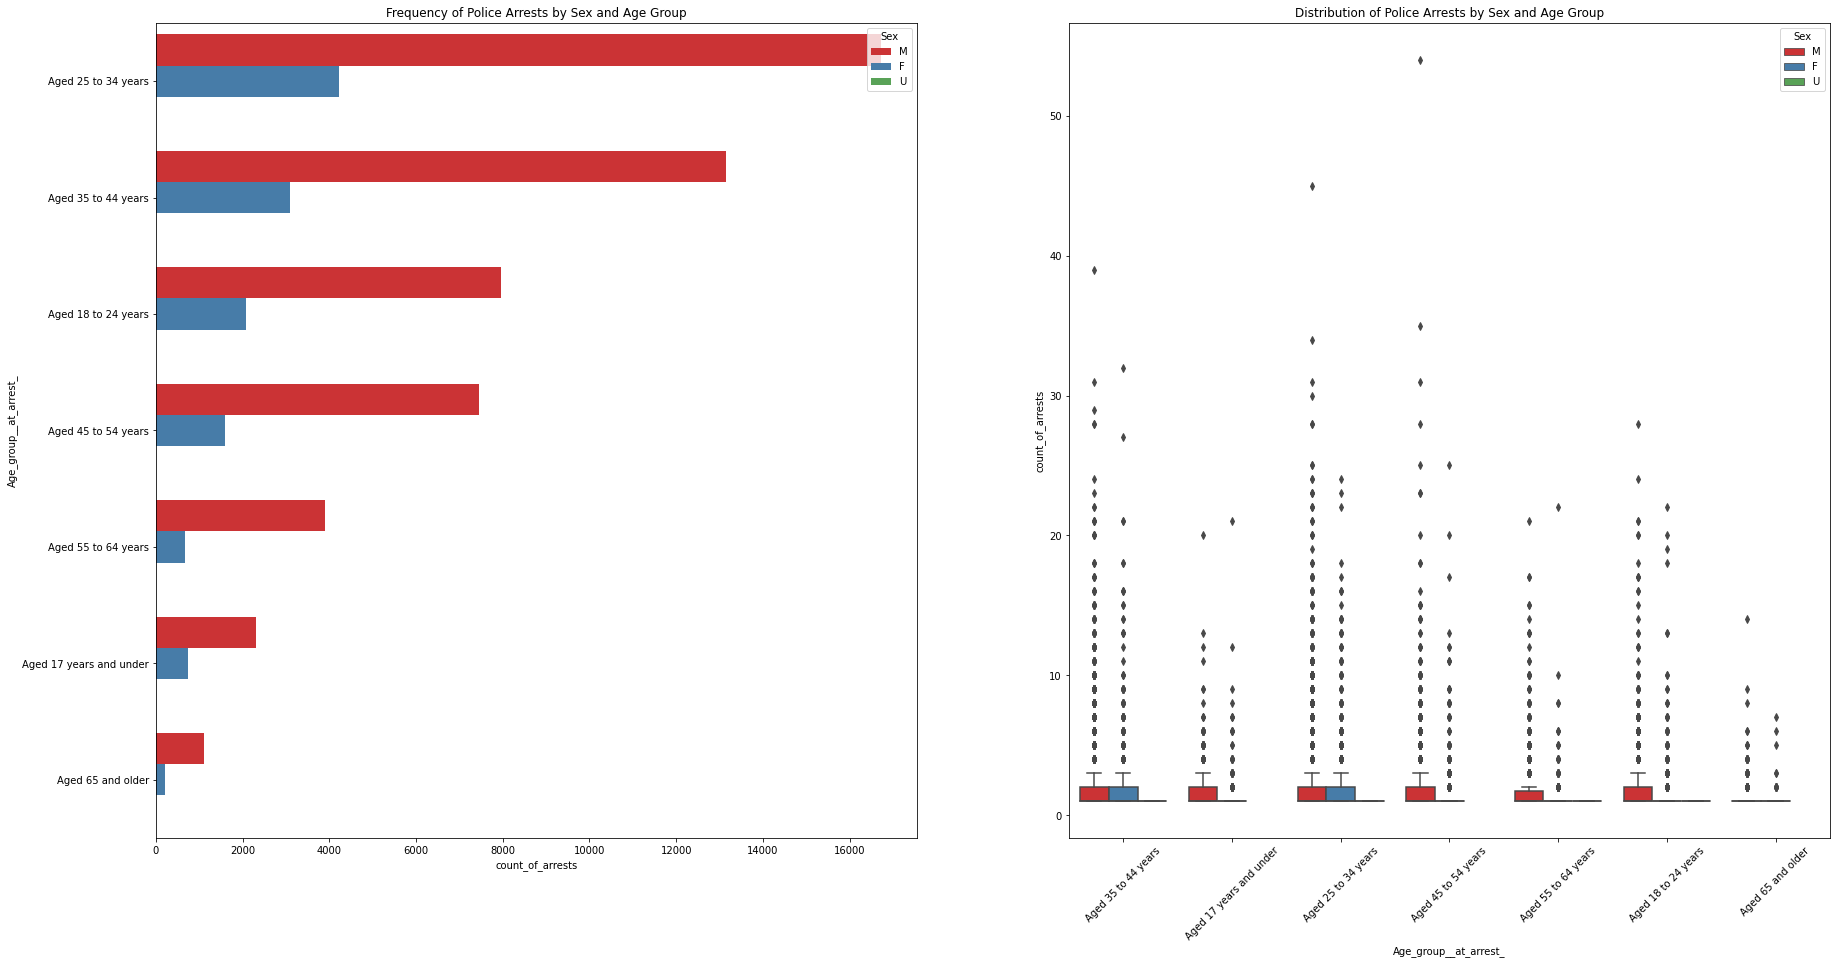

In [204]:
# visualize the distribution of female and male offenders by age group

f, axes = plt.subplots(1, 2, figsize=(30, 15))

# barplot of number of arrests by age group
sns.barplot(data=grouped_sex_df, y="Age_group__at_arrest_", x= "count_of_arrests", hue="Sex", palette="Set1", ax=axes[0])
axes[0].set_title("Frequency of Police Arrests by Sex and Age Group")

# boxplot of number of arrests by age group
sns.boxplot(data=sex_subset_df, x="Age_group__at_arrest_", y= "count_of_arrests", hue="Sex", palette="Set1", ax=axes[1])
plt.xticks(rotation=45)
axes[1].set_title("Distribution of Police Arrests by Sex and Age Group")

#### **Analysis of Independent Variable: Perceived Race**

In [205]:
# create race subset
perceived_race_df = processed_df.groupby(["PersonID","Perceived_Race", "Age_group__at_arrest_"]).agg({"PersonID":"count", "Booked":"sum", "StripSearch":"sum" })
perceived_race_df.rename(columns={"PersonID":"count_of_arrests"}, inplace=True)
perceived_race_df.reset_index(inplace=True)
perceived_race_df

,PersonID,Perceived_Race,Age_group__at_arrest_,count_of_arrests,Booked,StripSearch
0,300000,East/Southeast Asian,Aged 35 to 44 years,1,0,0
1,300001,White,Aged 17 years and under,1,1,0
2,300002,White,Aged 35 to 44 years,1,0,0
3,300003,White,Aged 25 to 34 years,6,5,1
4,300003,White,Aged 35 to 44 years,2,1,0
...,...,...,...,...,...,...
41126,337342,White,Aged 17 years and under,5,1,0
41127,337343,White,Aged 35 to 44 years,1,1,0
41128,337344,Black,Aged 18 to 24 years,1,1,1
41129,337345,Black,Aged 65 and older,1,0,0


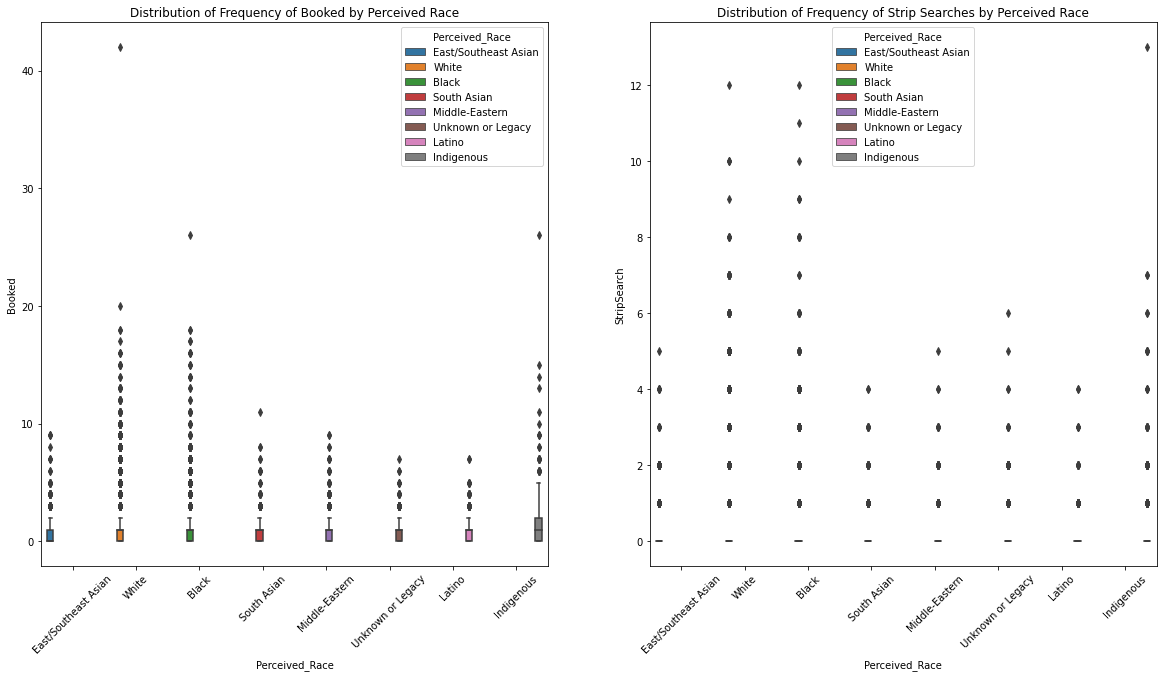

In [ ]:
# distribution of the frequency of strip search and booked by sex
f, axes = plt.subplots(1, 2, figsize=(20, 10))

# distribution of booked by sex
sns.boxplot(data=perceived_race_df, x = "Perceived_Race", y = "Booked", hue="Perceived_Race", ax= axes[0])
axes[0].set_title("Distribution of Frequency of Booked by Perceived Race")
axes[0].tick_params(axis='x', labelrotation=45)

# distribution of strip search by sex
sns.boxplot(data=perceived_race_df, x = "Perceived_Race", y = "StripSearch", hue="Perceived_Race", ax= axes[1])
axes[1].set_title("Distribution of Frequency of Strip Searches by Perceived Race")
axes[1].tick_params(axis='x', labelrotation=45)

**Police Arrests by Age Group and Sex**

In [ ]:
# getting counts of arrests by age group and perceived race
race_age_df = perceived_race_df.groupby(["Perceived_Race", "Age_group__at_arrest_"]).agg({"count_of_arrests":"sum", "Booked":"sum", "StripSearch":"sum"}).reset_index()
race_age_df.sort_values(by="count_of_arrests", ascending=False, inplace=True)
race_age_df

,Perceived_Race,Age_group__at_arrest_,count_of_arrests,Booked,StripSearch
58,White,Aged 25 to 34 years,8291,4583,1280
59,White,Aged 35 to 44 years,7763,4305,1130
2,Black,Aged 25 to 34 years,6332,3693,889
60,White,Aged 45 to 54 years,4775,2509,520
1,Black,Aged 18 to 24 years,3791,2189,643
...,...,...,...,...,...
38,Middle-Eastern,Aged 65 and older,16,5,0
30,Latino,Aged 65 and older,15,8,3
31,Latino,Aged 65 years and older,12,6,0
23,Indigenous,Aged 65 years and older,8,4,0


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Aged 25 to 34 years'),
  Text(1, 0, 'Aged 35 to 44 years'),
  Text(2, 0, 'Aged 45 to 54 years'),
  Text(3, 0, 'Aged 18 to 24 years'),
  Text(4, 0, 'Aged 55 to 64 years'),
  Text(5, 0, 'Aged 17 years and under'),
  Text(6, 0, 'Aged 65 years and older'),
  Text(7, 0, 'Aged 65 and older')])

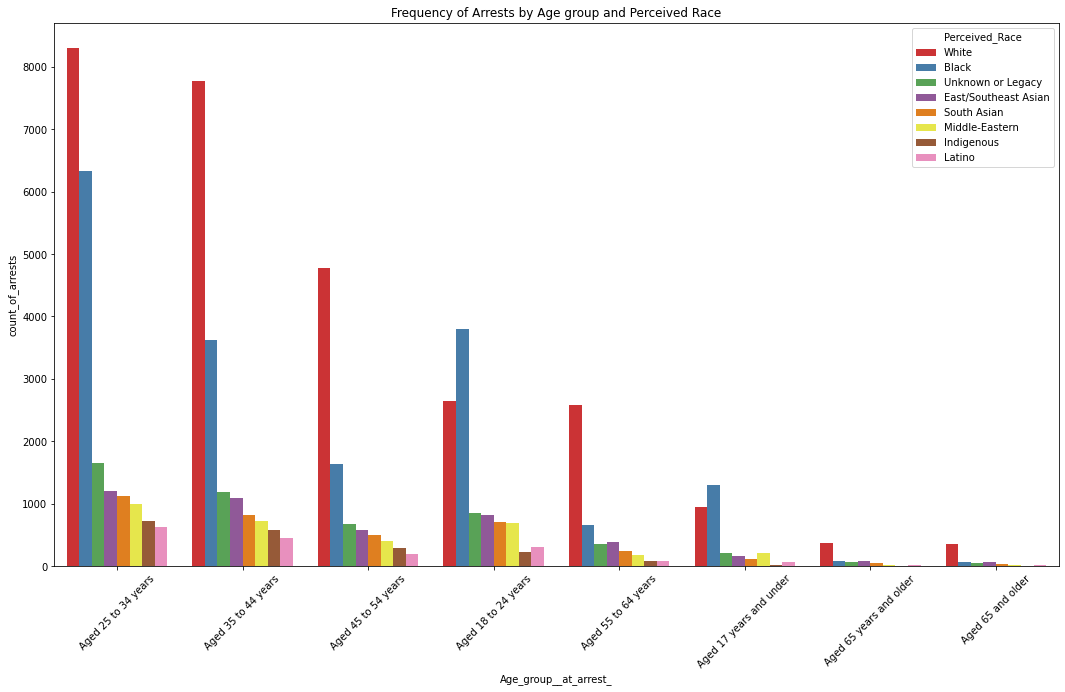

In [ ]:
# visualize the frequency of arrests by age group and perceived race
f = plt.figure(figsize=(18, 10))
sns.barplot(data=race_age_df, x="Age_group__at_arrest_", y= "count_of_arrests", hue="Perceived_Race", palette="Set1")
plt.title("Frequency of Arrests by Age group and Perceived Race")
plt.xticks(rotation=45)

#### **Bivariate Analysis of Sex and Perceived Race**

In [ ]:
# subset dataset by sex and perceived race on count of arrests
sex_race = processed_df.groupby(["PersonID", "Sex", "Perceived_Race"]).agg({"PersonID":"count", "Booked":"sum", "StripSearch":"sum"})
sex_race.rename(columns={"PersonID":"count_of_arrests"}, inplace=True)
sex_race.reset_index(inplace=True)
sex_race

,PersonID,Sex,Perceived_Race,count_of_arrests,Booked,StripSearch
0,300000,M,East/Southeast Asian,1,0,0
1,300001,F,White,1,1,0
2,300002,M,White,1,0,0
3,300003,M,White,8,6,1
4,300004,M,Black,1,1,0
...,...,...,...,...,...,...
40422,337342,M,White,5,1,0
40423,337343,M,White,1,1,0
40424,337344,M,Black,1,1,1
40425,337345,M,Black,1,0,0


Text(0.5, 1.0, 'Distribution of Arrests by Sex and Race')

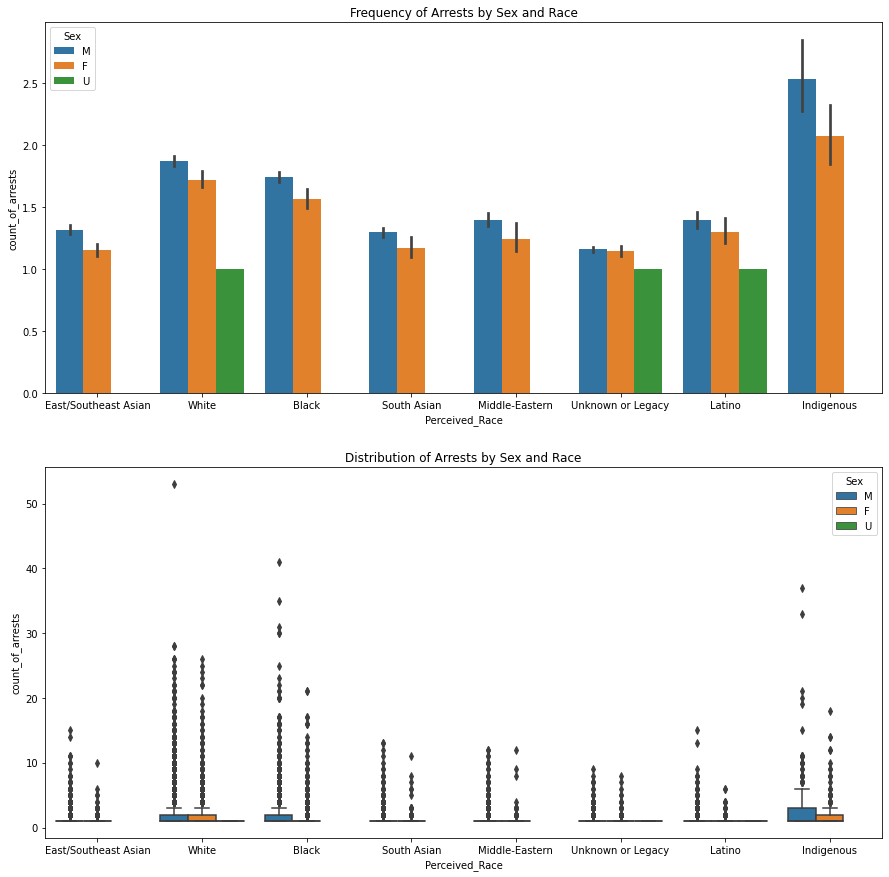

In [ ]:
f, axes= plt.subplots(2, 1, figsize=(15, 15))

# frequency of arrests by sex and race
sns.barplot(data=sex_race, x = "Perceived_Race", y = "count_of_arrests", hue="Sex", ax= axes[0])
axes[0].set_title("Frequency of Arrests by Sex and Race")

# distribution of arrests by sex race
sns.boxplot(data=sex_race, x = "Perceived_Race", y = "count_of_arrests", hue="Sex", ax= axes[1])
axes[1].set_title("Distribution of Arrests by Sex and Race")

#### **Proportion of Arrests Leading to Strip Search or Booked by Race and Sex**

In [ ]:
# proportion of arrests leading to booked and strips search by race
grouped_perceived_race_df = perceived_race_df.groupby("Perceived_Race").agg({"count_of_arrests":"sum", "Booked":"sum", "StripSearch":"sum"})

# compute total arrests
total_arrests = grouped_perceived_race_df["count_of_arrests"].sum()

# compute proportion of booked
def proportion_booked(row):
    total_arrests = row["count_of_arrests"]
    return (row["Booked"]/total_arrests)*100

# compute proportion of strip searches
def proportion_strip(row):
    total_arrests = row["count_of_arrests"]
    return (row["StripSearch"]/total_arrests)*100

grouped_perceived_race_df["Proportion of Arrests"] = grouped_perceived_race_df["count_of_arrests"].apply(lambda x: (x/total_arrests)*100).round(1)
grouped_perceived_race_df["Proportion of Booked"] = grouped_perceived_race_df.apply(proportion_booked, axis=1).round(1)
grouped_perceived_race_df["Proportion of Strip"] = grouped_perceived_race_df.apply(proportion_strip, axis=1).round(1)
grouped_perceived_race_df

,count_of_arrests,Booked,StripSearch,Proportion of Arrests,Proportion of Booked,Proportion of Strip
Perceived_Race,,,,,,
Black,17518,9833,2434,26.8,56.1,13.9
East/Southeast Asian,4412,2110,341,6.8,47.8,7.7
Indigenous,1932,1099,306,3.0,56.9,15.8
Latino,1768,974,132,2.7,55.1,7.5
Middle-Eastern,3237,1649,228,5.0,50.9,7.0
South Asian,3613,1789,257,5.5,49.5,7.1
Unknown or Legacy,5059,2491,537,7.8,49.2,10.6
White,27713,14532,3566,42.5,52.4,12.9


In [ ]:
# proportion of arrests leading to booked and strips search by sex
grouped_perceived_sex_df = sex_subset_df.groupby("Sex").agg({"count_of_arrests":"sum", "Booked":"sum", "StripSearch":"sum"})

# compute total arrests
total_arrests = grouped_perceived_sex_df["count_of_arrests"].sum()


# compute proportion of booked
def proportion_booked(row):
    total_arrests = row["count_of_arrests"]
    return (row["Booked"]/total_arrests)*100

# compute proportion of strip searches
def proportion_strip(row):
    total_arrests = row["count_of_arrests"]
    return (row["StripSearch"]/total_arrests)*100

grouped_perceived_sex_df["Proportion of Arrests"] = grouped_perceived_sex_df["count_of_arrests"].apply(lambda x: (x/total_arrests)*100).round(1)
grouped_perceived_sex_df["Proportion of Booked"] = grouped_perceived_sex_df.apply(proportion_booked, axis=1).round(1)
grouped_perceived_sex_df["Proportion of Strip"] = grouped_perceived_sex_df.apply(proportion_strip, axis=1).round(1)
grouped_perceived_sex_df

,count_of_arrests,Booked,StripSearch,Proportion of Arrests,Proportion of Booked,Proportion of Strip
Sex,,,,,,
F,12609,5581,1283,19.3,44.3,10.2
M,52634,28894,6518,80.7,54.9,12.4
U,9,2,0,0.0,22.2,0.0


### **T-test: Sex and Police Arrests**

#### **data subset**

In [ ]:
#subset of data with individual's sex and total number of arrests
sex_df = processed_df.groupby(['PersonID',"Sex"]).agg(Count_of_Arrests=("PersonID","count")).reset_index()
print(sex_df)

       PersonID Sex  Count_of_Arrests
0        300000   M                 1
1        300001   F                 1
2        300002   M                 1
3        300003   M                 8
4        300004   M                 1
...         ...  ..               ...
37385    337342   M                 5
37386    337343   M                 1
37387    337344   M                 1
37388    337345   M                 1
37389    337346   M                 1

[37390 rows x 3 columns]


In [ ]:
# checking for missing values
sex_df.isnull().any()

PersonID            False
Sex                 False
Count_of_Arrests    False
dtype: bool

Text(0.5, 1.0, 'Boxplot of Arrest Amount by Sex')

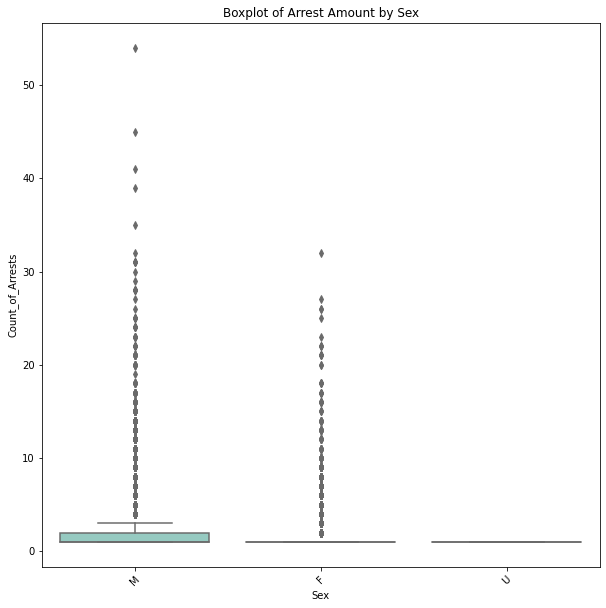

In [ ]:
# generate side-by-side boxplot to see the distribution of the number of times an individual is arrested with respect to sex
f = plt.figure(figsize=(10,10))
sns.boxplot(x="Sex", y="Count_of_Arrests", data=sex_df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Boxplot of Arrest Amount by Sex")

#### **assumption check**

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


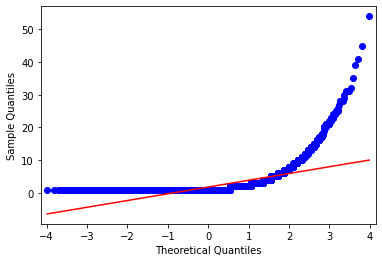

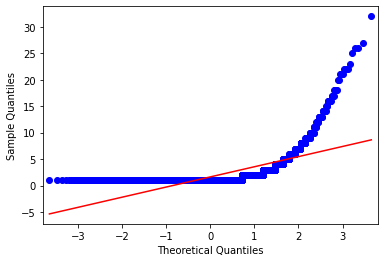

In [ ]:
import statsmodels.api as sm 
import pylab
sm.qqplot(sex_df.loc[sex_df.loc[:,'Sex']=='M','Count_of_Arrests'], line='s') 
pylab.show() 
sm.qqplot(sex_df.loc[sex_df.loc[:,'Sex']=='F','Count_of_Arrests'], line='s') 
pylab.show()
#normality test: non-normal

In [ ]:
def get_significance(p):
  """Returns the significance of a p-values as a string of stars."""
  if p <= 0.001:
    return '***'
  elif p <= 0.01:
    return '**'
  elif p <= 0.05:
    return '*'
  elif p <= 0.1:
    return '.'
  else:
    return ''

def round_p_value(p):
  """Round a small p-value so that it is human-readable."""
  if p < 0.001:
    return '<0.001'
  else:
    return f'{p:5.3}'

In [ ]:
from scipy.stats import kstest

# get list of genders
genders = list(sex_df["Sex"].unique())

for gender in genders:
  subset = sex_df[sex_df["Sex"]==gender]
  stat, p = kstest(subset["Count_of_Arrests"], "norm")
  rounded_p = round_p_value(p)
  sig = get_significance(p)
  print(f"Subset: {gender}, statistic: {stat:.3f}, pvalue:", rounded_p, sig)
  if p < 0.05:
    print("Normality Assumption Violated")
    print()
  else:
    print("Assumption Satisfied")
    print()

Subset: M, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: F, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated



In [ ]:

# Variance Homogeneity Check:
group_s_m = sex_df.loc[sex_df.loc[:,'Sex']=='M']['Count_of_Arrests']
group_s_f = sex_df.loc[sex_df.loc[:,'Sex']=='F']['Count_of_Arrests']
leveneTestRes = stats.levene(group_s_m, group_s_f, center='mean')
print(leveneTestRes)
# From the test result, p<0.05, we know that the variances of the two groups are not constant.
# Therefore, we apply Welch's test by setting equal_var to be False

LeveneResult(statistic=28.196560039706192, pvalue=1.1022420724383595e-07)


#### **t-test for male&female and arrests**

In [ ]:
# Hypothesis:
# H0: On average, females and males don't show a difference in the number of being arrests.
# Ha: On average, females and males show a difference in the number of being arrests.

tind = stats.ttest_ind(a = group_s_m, b = group_s_f, equal_var=False)
print(tind.statistic)
print(tind.pvalue) 
# Then we conduct Welch's test.
# The p-value is smaller than 0.05, therefore we reject the null hypothesis and conclude that, 
# on average, there is a signifincant difference between male and female in their numbers of arrests.



5.3848082092215455
7.381040021829354e-08


### **T-test: Sex and Strip Search**

#### **data subset**

In [ ]:
# subset data for sex and total number of an individual has been strip searched
sex_ss_df = processed_df.groupby(['PersonID', "Sex"]).agg({"StripSearch":"sum"}).reset_index()
sex_ss_df.rename(columns={"StripSearch":"count_of_strip_search"}, inplace=True)
print(sex_ss_df)

       PersonID Sex  count_of_strip_search
0        300000   M                      0
1        300001   F                      0
2        300002   M                      0
3        300003   M                      1
4        300004   M                      0
...         ...  ..                    ...
37385    337342   M                      0
37386    337343   M                      0
37387    337344   M                      1
37388    337345   M                      0
37389    337346   M                      0

[37390 rows x 3 columns]


In [ ]:
# check missing value
sex_ss_df.isnull().any()

PersonID                 False
Sex                      False
count_of_strip_search    False
dtype: bool

Text(0.5, 1.0, 'Boxplot of Strip Search Amount by Sex')

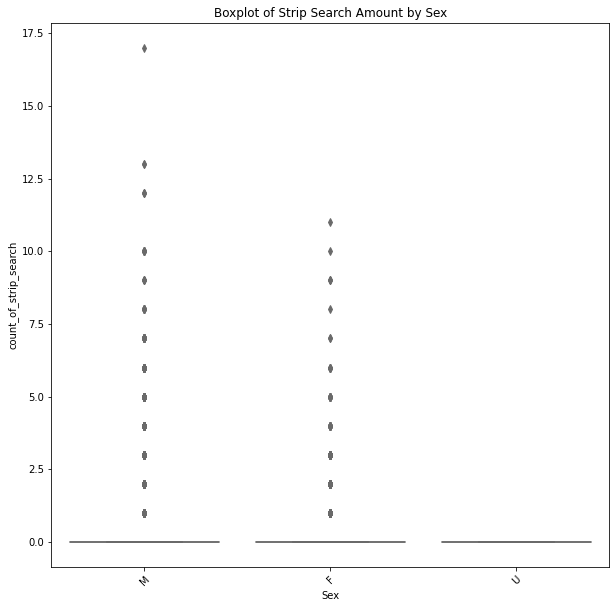

In [ ]:
f = plt.figure(figsize=(10,10))
sns.boxplot(x="Sex", y="count_of_strip_search", data=sex_ss_df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Boxplot of Strip Search Amount by Sex")

#### **assumption check**

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


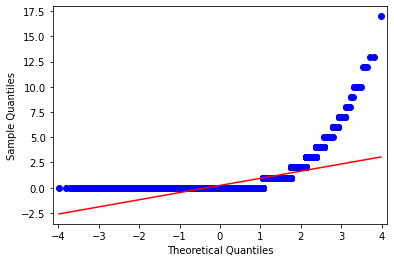

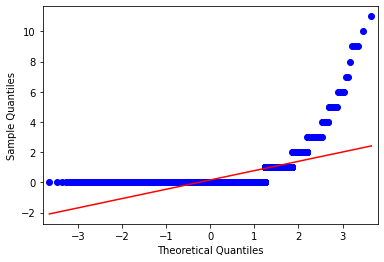

In [ ]:
sm.qqplot(sex_ss_df.loc[sex_ss_df.loc[:,'Sex']=='M','count_of_strip_search'], line='s') 
pylab.show() 
sm.qqplot(sex_ss_df.loc[sex_ss_df.loc[:,'Sex']=='F','count_of_strip_search'], line='s') 
pylab.show()
#normality test: non-normal

In [ ]:
# get list of genders
genders = list(sex_ss_df["Sex"].unique())

for gender in genders:
  subset = sex_ss_df[sex_ss_df["Sex"]==gender]
  stat, p = kstest(subset["count_of_strip_search"], "norm")
  rounded_p = round_p_value(p)
  sig = get_significance(p)
  print(f"Subset: {gender}, statistic: {stat:.3f}, pvalue:", rounded_p, sig)
  if p < 0.05:
    print("Normality Assumption Violated")
    print()
  else:
    print("Assumption Satisfied")
    print()

Subset: M, statistic: 0.500, pvalue: <0.001 ***
Normality Assumption Violated

Subset: F, statistic: 0.500, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.500, pvalue: 0.0132 *
Normality Assumption Violated



In [ ]:
# Variance Homogeneity Check:
group_ss_m = sex_ss_df.loc[sex_ss_df.loc[:,'Sex']=='M']['count_of_strip_search']
group_ss_f = sex_ss_df.loc[sex_ss_df.loc[:,'Sex']=='F']['count_of_strip_search']
leveneTestRes2 = stats.levene(group_ss_m, group_ss_f, center='mean')
print(leveneTestRes2)
# From the test result, we know that the variances of the two groups are not considered as constant.

LeveneResult(statistic=110.90615789275776, pvalue=6.744702480932474e-26)


#### **t-test for male&female and strip search**

In [ ]:
# Null hypothesis:
# H0: On average, females and males don't show a difference in the number of being strip searched.
# Ha: On average, females and males show a difference in the number of being strip searched.

tind_ss = stats.ttest_ind(a = group_ss_m, b = group_ss_f, equal_var = False)
print(tind_ss.statistic)
print(tind_ss.pvalue) 

# We apply Welch's test and get the resutls.
# The p-value is smaller than 0.05, therefore we reject the null hypothesis and conclude that, 
# on average, there is a signifincant difference between males and females in their numbers of strip searches.



6.495500992883376
8.566543261428306e-11


### **T-test: Race(Black&White, Indigenous&White) and Police Arrests**

#### **data subset**

In [ ]:
#subset of data with individual's sex and total number of arrests
p_race_df = processed_df.groupby(['PersonID',"Perceived_Race"]).agg(Count_of_Arrests=("PersonID","count")).reset_index()
print(p_race_df)


       PersonID        Perceived_Race  Count_of_Arrests
0        300000  East/Southeast Asian                 1
1        300001                 White                 1
2        300002                 White                 1
3        300003                 White                 8
4        300004                 Black                 1
...         ...                   ...               ...
40385    337342                 White                 5
40386    337343                 White                 1
40387    337344                 Black                 1
40388    337345                 Black                 1
40389    337346                 White                 1

[40390 rows x 3 columns]


In [ ]:
# check missing values
p_race_df.isnull().any()

PersonID            False
Perceived_Race      False
Count_of_Arrests    False
dtype: bool

Text(0.5, 1.0, 'Boxplot of Arrest Amount by Perceived Race')

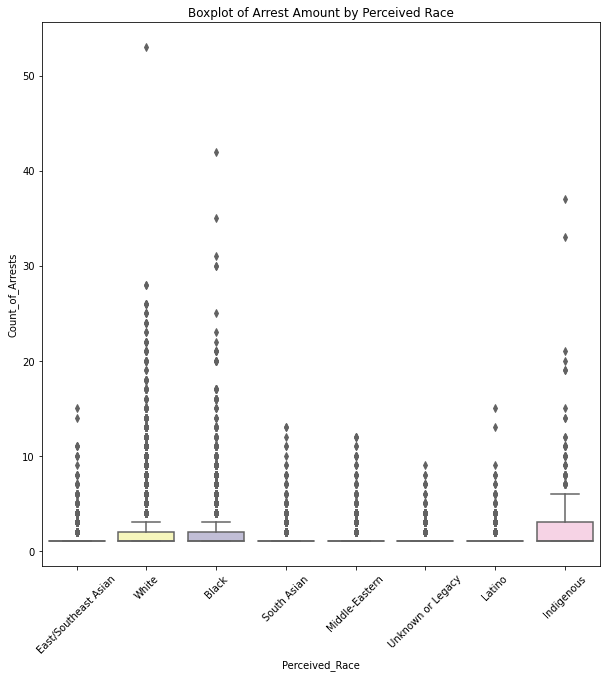

In [ ]:
# generate side-by-side boxplot to see the distribution of the number of times an individual is arrested with respect to sex
f = plt.figure(figsize=(10,10))
sns.boxplot(x="Perceived_Race", y="Count_of_Arrests", data=p_race_df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Boxplot of Arrest Amount by Perceived Race")

#### **assumption check**

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


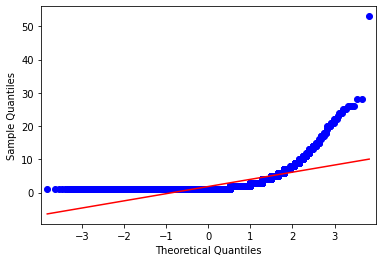

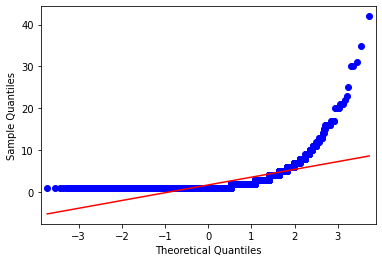

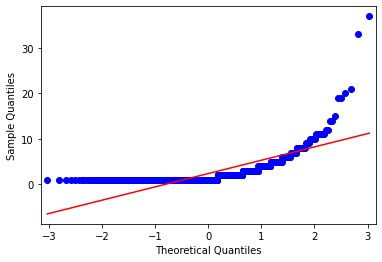

In [ ]:
import statsmodels.api as sm 

sm.qqplot(p_race_df.loc[p_race_df.loc[:,'Perceived_Race']=='White','Count_of_Arrests'], line='s') 
pylab.show() 
sm.qqplot(p_race_df.loc[p_race_df.loc[:,'Perceived_Race']=='Black','Count_of_Arrests'], line='s') 
pylab.show()
sm.qqplot(p_race_df.loc[p_race_df.loc[:,'Perceived_Race']=='Indigenous','Count_of_Arrests'], line='s') 
pylab.show()
#normality test: non-normal (p<0.05)

In [ ]:
# get list of races
races = list(p_race_df["Perceived_Race"].unique())

for race in races:
  subset = p_race_df[p_race_df["Perceived_Race"]==race]
  stat, p = kstest(subset["Count_of_Arrests"], "norm")
  rounded_p = round_p_value(p)
  sig = get_significance(p)
  print(f"Subset: {gender}, statistic: {stat:.3f}, pvalue:", rounded_p, sig)
  if p < 0.05:
    print("Normality Assumption Violated")
    print()
  else:
    print("Assumption Satisfied")
    print()

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated



In [ ]:
# Variance Homogeneity Check:
group_w = p_race_df.loc[p_race_df.loc[:,'Perceived_Race']=='White']['Count_of_Arrests']
group_b = p_race_df.loc[p_race_df.loc[:,'Perceived_Race']=='Black']['Count_of_Arrests']
leveneTestRes_r = stats.levene(group_w, group_b, center='mean')
print(leveneTestRes_r)
# From the test result, we know that the variances of the two groups are not constant.
# Therefore, we apply Welch's test by setting equal_var to be False

LeveneResult(statistic=67.96762140872832, pvalue=1.7418061982309808e-16)


In [ ]:
# Variance Homogeneity Check for indigenous and white:
group_w = p_race_df.loc[p_race_df.loc[:,'Perceived_Race']=='White']['Count_of_Arrests']
group_i = p_race_df.loc[p_race_df.loc[:,'Perceived_Race']=='Indigenous']['Count_of_Arrests']
leveneTestRes_r2 = stats.levene(group_w, group_i, center='mean')
print(leveneTestRes_r2)
# From the test result, we know that the variances of the two groups are not constant.
# Therefore, we apply Welch's test by setting equal_var to be False.

LeveneResult(statistic=59.83107697221077, pvalue=1.0953654412670449e-14)


#### **t-test for black&white**

In [ ]:
# Hypothesis:
# H0: On average, Black and White don't show a difference in the number of being arrests.
# Ha: On average, Black and White show a difference in the number of being arrests.

tind_r = stats.ttest_ind(a = group_w, b = group_b, equal_var=False)
print(tind_r.statistic)
print(tind_r.pvalue) 
# Then we conduct Welch's test.
# The p-value is smaller than 0.05, therefore we reject the null hypothesis and conclude that, 
# on average, there is a signifincant difference between black and white in their amount of being arrested.


5.002415488701116
5.701721645535063e-07


#### **t-test for white&Indigenous**

In [ ]:
# Hypothesis:
# H0: White and Indigenous don't show a difference in the number of being arrested on average.
# Ha: White and Indigenous show a difference in the number of being arrested on average.

tind_r2 = stats.ttest_ind(a = group_i, b = group_w, equal_var=False)
print(tind_r2.statistic)
print(tind_r2.pvalue) 
# Then we conduct Welch's test.
# The p-value is smaller than 0.05, therefore we reject the null hypothesis and conclude that, 
# on average, there is a signifincant difference between indigenous and white in their amount of being arrested.


5.094407347210731
4.2978709354381165e-07


### **T-test: Youth&Non-youth and Police Arrests**

#### **data subset**

In [ ]:
#subset of data with individual's sex and total number of arrests
whether_youth_df = processed_df.groupby(['PersonID',"Youth_at_arrest__under_18_years"]).agg(Count_of_Arrests=("PersonID","count")).reset_index()
print(whether_youth_df)


       PersonID  Youth_at_arrest__under_18_years  Count_of_Arrests
0        300000                      Not a youth                 1
1        300001  Youth (aged 17 years and under)                 1
2        300002                      Not a youth                 1
3        300003                      Not a youth                 8
4        300004                      Not a youth                 1
...         ...                              ...               ...
37452    337342  Youth (aged 17 years and under)                 5
37453    337343                      Not a youth                 1
37454    337344                      Not a youth                 1
37455    337345                      Not a youth                 1
37456    337346                      Not a youth                 1

[37457 rows x 3 columns]


In [ ]:
#check missing value
whether_youth_df.isnull().any()

PersonID                           False
Youth_at_arrest__under_18_years    False
Count_of_Arrests                   False
dtype: bool

In [ ]:
# re-group the variable of whether one is youth or not.
whether_youth_df["whether_youth"] = whether_youth_df.apply(lambda x: "N" if x.Youth_at_arrest__under_18_years=="Not a youth" else "Y", axis=1)
print(whether_youth_df)

       PersonID  Youth_at_arrest__under_18_years  Count_of_Arrests  \
0        300000                      Not a youth                 1   
1        300001  Youth (aged 17 years and under)                 1   
2        300002                      Not a youth                 1   
3        300003                      Not a youth                 8   
4        300004                      Not a youth                 1   
...         ...                              ...               ...   
37452    337342  Youth (aged 17 years and under)                 5   
37453    337343                      Not a youth                 1   
37454    337344                      Not a youth                 1   
37455    337345                      Not a youth                 1   
37456    337346                      Not a youth                 1   

      whether_youth  
0                 N  
1                 Y  
2                 N  
3                 N  
4                 N  
...             ...  
37452

Text(0.5, 1.0, 'Boxplot of Arrest Amount by Whether one is a Youth or Not')

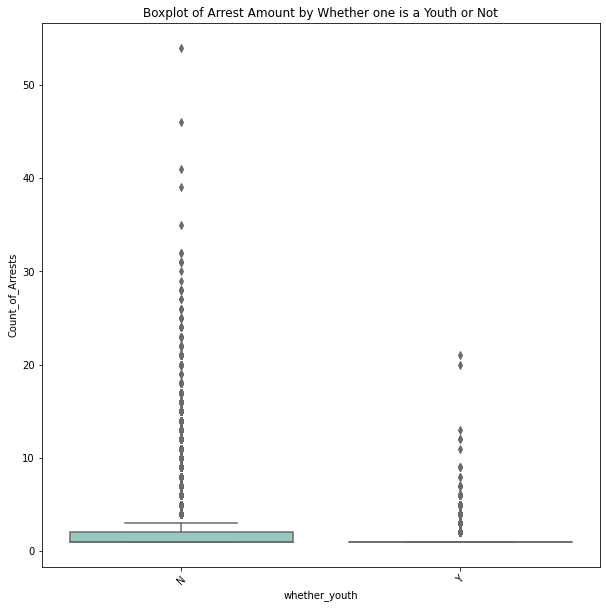

In [ ]:
# generate side-by-side boxplot to see the distribution of the number of times an individual is arrested with respect to sex
f = plt.figure(figsize=(10,10))
sns.boxplot(x="whether_youth", y="Count_of_Arrests", data=whether_youth_df, palette="Set3")
plt.xticks(rotation=45)
plt.title("Boxplot of Arrest Amount by Whether one is a Youth or Not")

#### **assumption check**

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


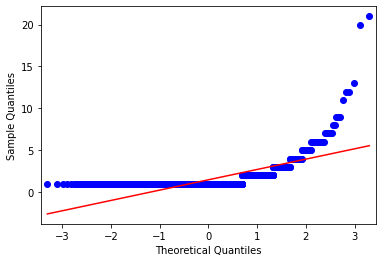

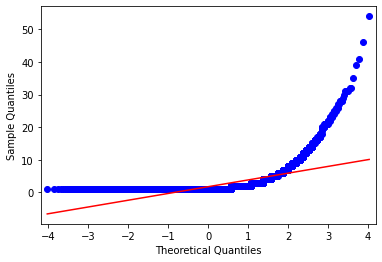

In [ ]:
sm.qqplot(whether_youth_df.loc[whether_youth_df.loc[:,'whether_youth']=='Y','Count_of_Arrests'], line='s') 
pylab.show() 
sm.qqplot(whether_youth_df.loc[whether_youth_df.loc[:,'whether_youth']=='N','Count_of_Arrests'], line='s') 
pylab.show()

In [ ]:
# get list of youth indicators
youths = list(whether_youth_df["whether_youth"].unique())

for youth in youths:
  subset = whether_youth_df[whether_youth_df["whether_youth"]==youth]
  stat, p = kstest(subset["Count_of_Arrests"], "norm")
  rounded_p = round_p_value(p)
  sig = get_significance(p)
  print(f"Subset: {gender}, statistic: {stat:.3f}, pvalue:", rounded_p, sig)
  if p < 0.05:
    print("Normality Assumption Violated")
    print()
  else:
    print("Assumption Satisfied")
    print()

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: U, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated



In [ ]:
# Variance Homogeneity Check:
group_youth = whether_youth_df.loc[whether_youth_df.loc[:,'whether_youth']=='Y']['Count_of_Arrests']
group_non_youth = whether_youth_df.loc[whether_youth_df.loc[:,'whether_youth']=='N']['Count_of_Arrests']
leveneTestRes_y = stats.levene(group_youth, group_non_youth, center='mean')
print(leveneTestRes_y)
# From the test result, we know that the variances of the two groups are not constant.
# Therefore, we apply Welch's test by setting equal_var to be False

LeveneResult(statistic=100.00837316892441, pvalue=1.6242691353597676e-23)


#### **t-test for youth&non-youth**

In [ ]:
# Hypothesis:
# H0: Youth and Non-youth don't show a difference in the total number of arrests on average.
# Ha: Youth and Non-youth show a difference in the total number of arrests on average.

tind_y = stats.ttest_ind(a = group_non_youth, b = group_youth, equal_var=False)
print(tind_y.statistic)
print(tind_y.pvalue) 
# Then we conduct Welch's test.
# The p-value is smaller than 0.05, therefore we reject the null hypothesis and conclude that, 
# on average, there is a signifincant difference between youth and non-youth in their amount of being arrested.



10.233359483537276
3.688918451540259e-24


# **One-way ANOVA: Racial Disparity**

**Reserach Question 1:** Among those who have been arrested, is there a significant difference in the frequency of police arrested by perceived race?

- H0: There is no significant difference in the mean number of police arrests by perceived race.

- HA: There is a significant difference in the mean number of police arrests by perceived race.

In [ ]:
# trim data
perceived_race_df_trim = perceived_race_df[["PersonID", "Perceived_Race", "count_of_arrests"]].copy()
perceived_race_df_trim.head()

,PersonID,Perceived_Race,count_of_arrests
0,300000,East/Southeast Asian,1
1,300001,White,1
2,300002,White,1
3,300003,White,6
4,300003,White,2


In [ ]:
# checking for missing values
missing_race = perceived_race_df_trim["Perceived_Race"].isnull().any()
missing_counts = perceived_race_df_trim["count_of_arrests"].isnull().any()

print(f"Missing race: {missing_race}")
print(f"Missing counts: {missing_counts}")

Missing race: False
Missing counts: False


Text(0.5, 1.0, 'Distribution of Arrests by Perceived Race')

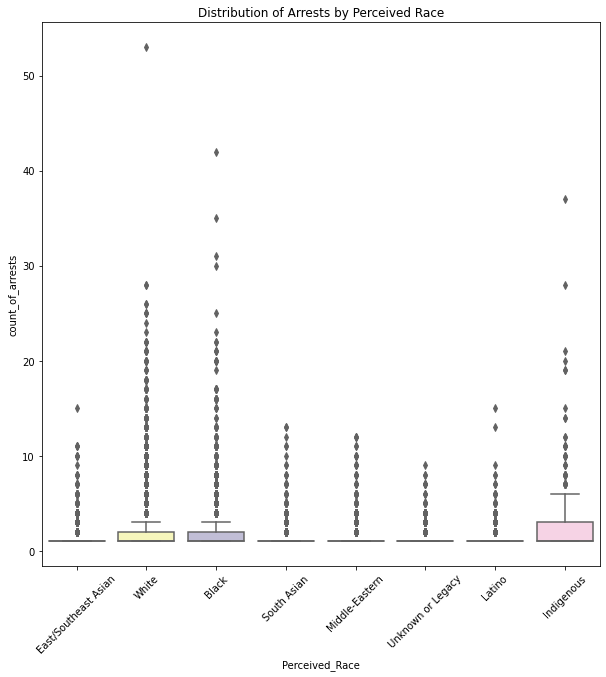

In [ ]:
# generate side-by-side boxplot to see the distribution of the number of times an indivdiadual is booked with respect to perceived race
f = plt.figure(figsize=(10,10))
sns.boxplot(x="Perceived_Race", y="count_of_arrests", data=perceived_race_df_trim, palette="Set3")
plt.xticks(rotation=45)
plt.title("Distribution of Arrests by Perceived Race")

#### **Handling Outliers**

In the context of the reserach question, we will consider outliers as legitimate data points as they may be important to understanding the patterns and disparities the mean number of arrests by perceived race.


#### **Checking of Normality**

To check for the Normality of the number of arrests, we will conduct a Kolmogorov-Smirnov test.

In [ ]:
def get_significance(p):
  """Returns the significance of a p-values as a string of stars."""
  if p <= 0.001:
    return '***'
  elif p <= 0.01:
    return '**'
  elif p <= 0.05:
    return '*'
  elif p <= 0.1:
    return '.'
  else:
    return ''

def round_p_value(p):
  """Round a small p-value so that it is human-readable."""
  if p < 0.001:
    return '<0.001'
  else:
    return f'{p:5.3}'

In [ ]:
from scipy.stats import kstest

# get list of races
races = list(perceived_race_df_trim["Perceived_Race"].unique())

for race in races:
  subset = perceived_race_df_trim[perceived_race_df_trim["Perceived_Race"]==race]
  stat, p = kstest(subset["count_of_arrests"], "norm")
  rounded_p = round_p_value(p)
  sig = get_significance(p)
  print(f"Subset: {race}, statistic: {stat:.3f}, pvalue:", rounded_p, sig)
  if p < 0.05:
    print("Normality Assumption Violated")
    print()
  else:
    print("Assumption Satisfied")
    print()

Subset: East/Southeast Asian, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: White, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: Black, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: South Asian, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: Middle-Eastern, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: Unknown or Legacy, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: Latino, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated

Subset: Indigenous, statistic: 0.841, pvalue: <0.001 ***
Normality Assumption Violated



#### **Checking of Homodescasity of Equal Variances**

To check for the homogeneity of equal variances of the number of bookings across each racial subgroup, we will use Levene's test:


*   Null: There is equal variances.
*   Alternative: There is no equal variances.



In [ ]:
from scipy.stats import levene

# get list of races
races = list(perceived_race_df_trim["Perceived_Race"].unique())

# Split the data into groups based on perceived race
race_groups = [perceived_race_df_trim[perceived_race_df_trim['Perceived_Race'] == race]['count_of_arrests'] for race in races]

# Perform Levene's test
statistic, p_value = levene(*race_groups)
rounded_p = round_p_value(p_value)
sig = get_significance(p_value)


print(f"Levene's test statistic: {statistic:.3f}")
print("p-value:", rounded_p, sig)
print()

if p_value < 0.05:
  print("The homodescasity assumption is violated.")
else:
  print("The homodescasity assumption has been satisfied.")

Levene's test statistic: 144.998
p-value: <0.001 ***

The homodescasity assumption is violated.


#### **Conducting Welch's One-way ANOVA for Unequal Variances**

In [ ]:
# import modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# create the model using ols
model = ols('count_of_arrests ~ Perceived_Race', data=perceived_race_df_trim).fit(cov="hc3")

# perform the Welch's one-way ANOVA using anova_lm
welch_aov = sm.stats.anova_lm(model, typ=2, robust='hc3')

# view the results
print(welch_aov)

                       sum_sq       df           F  PR(>F)
Perceived_Race    4971.485314      7.0  254.352519     0.0
Residual        114967.513375  41174.0         NaN     NaN


In [ ]:
# get rounded p-value and significance
p = welch_aov["PR(>F)"][0]
round_p = round_p_value(p)
sig = get_significance(p)

# get f-statistic
statistic = welch_aov["F"][0]

print(f"Welch's One-way ANOVA: s = {statistic:.2f}, p =", round_p, sig)

Welch's One-way ANOVA: s = 254.35, p = <0.001 ***


#### **Post-hoc Tukey HSD Test**

In [ ]:
# import modules 
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# perform Tukey's test 
tukey = pairwise_tukeyhsd(endog=perceived_race_df_trim['count_of_arrests'],
                          groups=perceived_race_df_trim['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.3913  0.001 -0.4906  -0.292   True
               Black           Indigenous    0.649  0.001  0.4668  0.8312   True
               Black               Latino  -0.3149  0.001 -0.4634 -0.1663   True
               Black       Middle-Eastern  -0.3058  0.001 -0.4208 -0.1907   True
               Black          South Asian   -0.403  0.001 -0.5098 -0.2961   True
               Black    Unknown or Legacy   -0.517  0.001  -0.608 -0.4261   True
               Black                White   0.1264  0.001  0.0623  0.1904   True
East/Southeast Asian           Indigenous   1.0403  0.001  0.8449  1.2357   True
East/Southeast Asian               Latino   0.0765 0.8369  -0.088  0.2409  False
East/Southeast Asian       M

# **Two-way ANOVA: Racial and Sexual Disparity**

**Reserach Question 2:** Among those who have been arrested, is there a significant difference in the frequency of police arrested by perceived race and sex?

- H0: There is no significant difference in the mean number of police arrests by perceived race.

- HA: There is a significant difference in the mean number of police arrests by perceived race.

In [ ]:
# subset data for perceived race and sex and number of times an individual has been arrested
p_race_sex_youth_df = processed_df.groupby(['PersonID', "Sex", "Perceived_Race","Youth_at_arrest__under_18_years"]).agg({"ArrestID":"count"}).reset_index()
p_race_sex_youth_df.rename(columns={"ArrestID":"count_of_arrests"}, inplace=True)
print(p_race_sex_youth_df)
# remove zero values to narrow down the target population
p_race_sex_youth_df["whether_youth"] = p_race_sex_youth_df.apply(lambda x: "N" if x.Youth_at_arrest__under_18_years=="Not a youth" else "Y", axis=1)
print(p_race_sex_youth_df)



       PersonID Sex        Perceived_Race  Youth_at_arrest__under_18_years  \
0        300000   M  East/Southeast Asian                      Not a youth   
1        300001   F                 White  Youth (aged 17 years and under)   
2        300002   M                 White                      Not a youth   
3        300003   M                 White                      Not a youth   
4        300004   M                 Black                      Not a youth   
...         ...  ..                   ...                              ...   
40518    337342   M                 White  Youth (aged 17 years and under)   
40519    337343   M                 White                      Not a youth   
40520    337344   M                 Black                      Not a youth   
40521    337345   M                 Black                      Not a youth   
40522    337346   M                 White                      Not a youth   

       count_of_arrests  
0                     1  
1          

In [ ]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
model = ols('count_of_arrests ~ C(Sex) + C(Perceived_Race) + C(whether_youth) + C(Sex):C(Perceived_Race)+ C(whether_youth):C(Perceived_Race) +C(Sex):C(whether_youth)', data=p_race_sex_youth_df).fit()
sm.stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(Sex),2.0,56.237923,28.118961,9.604222,6.759716e-05
C(Perceived_Race),7.0,3087.137555,441.019651,150.633247,1.662327e-220
C(whether_youth),1.0,134.842054,134.842054,46.056216,1.164870e-11
C(Sex):C(Perceived_Race),14.0,33.344656,2.381761,0.813507,6.552287e-01
C(whether_youth):C(Perceived_Race),7.0,110.198709,15.742673,5.377016,3.571977e-06
C(Sex):C(whether_youth),2.0,4.008840,2.004420,0.684623,5.042860e-01
Residual,40495.0,118560.086072,2.927771,NaN,NaN


In [ ]:
p_race_sex_youth_df['combination'] = p_race_sex_youth_df.whether_youth + " / " + p_race_sex_youth_df.Perceived_Race

tukey_results = pairwise_tukeyhsd(p_race_sex_youth_df['count_of_arrests'], p_race_sex_youth_df['combination'], alpha=0.05)

tukey_data = pd.DataFrame(data=tukey_results._results_table.data[1:], columns = tukey_results._results_table.data[0])

group1_comp =tukey_data.loc[tukey_data.reject == True].groupby('group1').reject.count()
group2_comp = tukey_data.loc[tukey_data.reject == True].groupby('group2').reject.count()
tukey_data = pd.concat([group1_comp, group2_comp], axis=1)

tukey_data = tukey_data.fillna(0)
tukey_data.columns = ['reject1', 'reject2']
tukey_data['total_sum'] = tukey_data.reject1 + tukey_data.reject2

tukey_data.sort_values('total_sum',ascending=False).head(16)


,reject1,reject2,total_sum
N / Indigenous,12.0,2.0,14.0
N / White,6.0,7.0,13.0
N / Black,10.0,0.0,10.0
N / Unknown or Legacy,2.0,5.0,7.0
N / East/Southeast Asian,4.0,1.0,5.0
Y / Black,0.0,5.0,5.0
N / Latino,2.0,2.0,4.0
N / Middle-Eastern,2.0,2.0,4.0
N / South Asian,2.0,2.0,4.0
Y / East/Southeast Asian,0.0,3.0,3.0


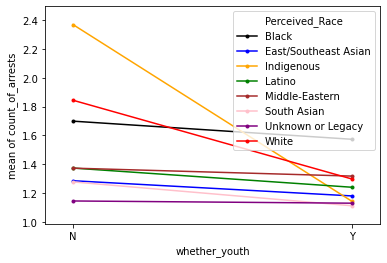

In [ ]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

interaction_plot_data = p_race_sex_youth_df[['count_of_arrests','whether_youth','Perceived_Race']].copy()
#interaction plot of significant interaction effect
fig = interaction_plot(x=interaction_plot_data['whether_youth'],
                       trace=interaction_plot_data["Perceived_Race"],
                       response=interaction_plot_data['count_of_arrests'],
                       colors=["black","blue","orange","green","brown","pink","purple","red"],legendloc="upper right", legendprop={0.6})
plt.show()